In [1]:
import numpy as np
import mass_balance as mb
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Math
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':'14'})
rc('text', usetex=False)

Here we attempt to reproduce some results from OS16. The main pts are: 
1. We do find that 1 wt% Mg in the core and default params leads to precipitation at 4000 K as stated in the paper. Note that the amount of Mg in the core does little to affect the equilibrium because the $K_d$ are not composition-dependent; instead it affects the timing of precipitation (less Mg implies greater cooling to reach precipitation onset).  
2. The $0.25\sigma$ cell can be compared to the Extended Data fig 1. We do get general agreement: FeO is approximately constant at 0.1; SiO2 exceeds FeO around 4000 K and Mgo is dominant. However, we do not get the downward slope at lower $T$. 
3. Our precipitation rates are similar to the $C_m = 5\times 10^{-5}$ quoted in the paper, though here $C_m$ does vary with $T$. 
4. In our attempt to reproduce Fig 2 of OS16 we get similar behaviour for the $0.25\sigma$ solution; however, the $0.75\sigma$ solution is off. I do not know why. 
5. The core becomes depleted in all LEs as in OS16. 
6. Du et al 2019 note that precipitation does not occur until 4750 K with 2 wt% Mg, though I could not tell whether they reduced the OS16 a and b values as we do below. If they do then we are in perfect agreement. 

In [2]:
# Data taken from Extended Data Table 1
a_Mg_OS, b_Mg_OS, c_Mg_OS = 0.1,-10851,0.0  # OS16
a_Si_OS, b_Si_OS, c_Si_OS = 1.3,-13500,0.0  # Originally from Fischer et ao 2015
a_O_OS , b_O_OS , c_O_OS  = 0.6,-3800 ,22.0 # Originally from Fischer et ao 2015

Tcmb = np.linspace(6000,3000,1001)
dT   = Tcmb[1]-Tcmb[0]

verbose = 2
var     = 1

MgO Exchange
MgO Exchange


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Initial core mole fractions of Fe  =   0.74 O   =   0.18 Si   =   0.05 Mg  =   0.04 All =   1.00
Initial mant mole fractions of FeO =   0.28 MgO =   0.64 SiO2 =   0.08 all =   1.00
Initial core mass fractions of O   =   6.12 Mg  =   1.93 Si  =   2.82
Initial mant mass fractions of FeO =  40.16 MgO =  50.71 SiO2 =   9.13
Core mole fractions of Fe  =   0.79 O   =   0.20 Si   =   0.01 Mg  =   0.00 All =   1.00
Mant mole fractions of FeO =   0.08 MgO =   0.78 SiO2 =   0.14 all =   1.00
Core mass fractions of O   =   6.77 Mg  =   0.13 Si  =   0.58
Mant mass fractions of FeO =  11.96 MgO =  69.12 SiO2 =  18.92
Initial core mole fractions of Fe  =   0.75 O   =   0.18 Si   =   0.05 Mg  =   0.02 All =   1.00
Initial mant mole fractions of FeO =   0.28 MgO =   0.64 SiO2 =   0.08 all =   1.00
Initial core mass fractions of O   =   6.18 Mg  =   0.98 Si  =   2.85
Initial mant mass fractions of FeO =  40.16 MgO =  50.71 SiO2 =   9.13
Core mole fractions of Fe  =   0.78 O   =   0.21 Si   =   0.01 Mg 

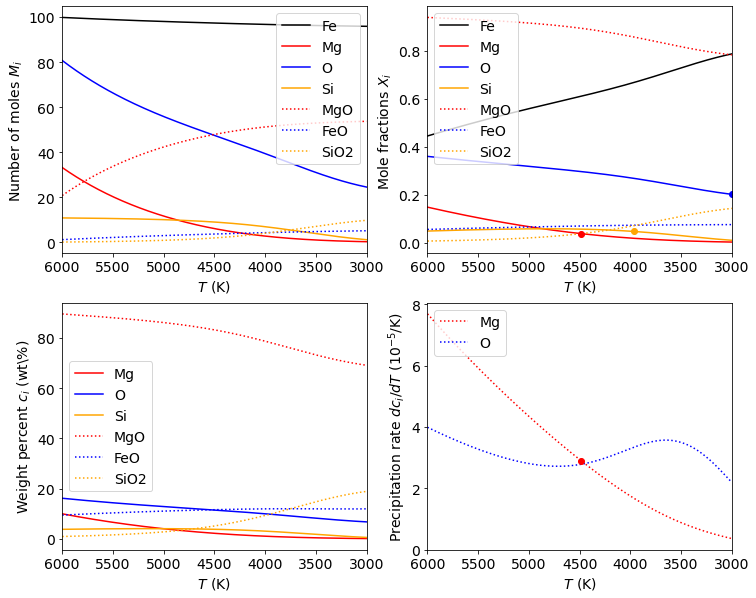

In [3]:
# Default case with a, b, c defined as above. 
Kd_Mg      = 10**mb.logKd(a_Mg_OS, b_Mg_OS, c_Mg_OS, Tcmb)
Kd_O       = 10**mb.logKd(a_O_OS , b_O_OS , c_O_OS , Tcmb) 
Kd_Si      = 10**mb.logKd(a_Si_OS, b_Si_OS, c_Si_OS, Tcmb) 

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # Default composition
iMFeO, iMMgO, iMSiO2  = 22, 50, 6
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol1 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var, verbose)

# Test statement that ar least 1% Mg needed toget prec above 4000K
iMFe, iMO, iMSi, iMMg = 79, 19, 5, 2 # Default composition
iMFeO, iMMgO, iMSiO2  = 22, 50, 6
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol1a = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var, verbose)

mb.print_init_conc(sol1[0],sol1[2])
mb.print_any_conc(sol1[1],sol1[3],-1)
mb.plot_all(Tcmb, sol1[5], sol1[1], sol1[3], sol1[4])
mb.print_init_conc(sol1a[0],sol1a[2])
mb.print_any_conc(sol1a[1],sol1a[3],-1)

MgO Exchange
Initial core mole fractions of Fe  =   0.74 O   =   0.18 Si   =   0.05 Mg  =   0.04 All =   1.00
Initial mant mole fractions of FeO =   0.28 MgO =   0.64 SiO2 =   0.08 all =   1.00
Initial core mass fractions of O   =   6.12 Mg  =   1.93 Si  =   2.82
Initial mant mass fractions of FeO =  40.16 MgO =  50.71 SiO2 =   9.13
Core mole fractions of Fe  =   0.81 O   =   0.18 Si   =   0.01 Mg  =   0.00 All =   1.00
Mant mole fractions of FeO =   0.11 MgO =   0.75 SiO2 =   0.14 all =   1.00
Core mass fractions of O   =   5.96 Mg  =   0.09 Si  =   0.31
Mant mass fractions of FeO =  16.52 MgO =  64.73 SiO2 =  18.75


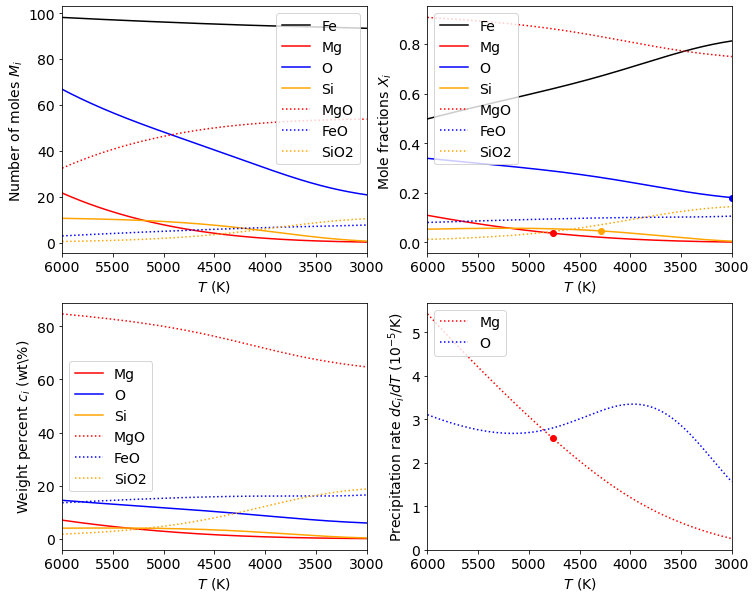

In [4]:
# Decrease a, b, c by 0.25 * sigma 
verbose = 2

fac = 0.25
a_O_OS_25s , b_O_OS_25s , c_O_OS_25s  = (a_O_OS-fac*0.4), (b_O_OS+fac*900) , (c_O_OS-fac*14) 

Kd_Mg      = 10**mb.logKd(a_Mg_OS   , b_Mg_OS, c_Mg_OS , Tcmb)   
Kd_O       = 10**mb.logKd(a_O_OS_25s, b_O_OS_25s , c_O_OS_25s , Tcmb) 
Kd_Si      = 10**mb.logKd(a_Si_OS   , b_Si_OS, c_Si_OS, Tcmb) 

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # Default composition
iMFeO, iMMgO, iMSiO2  = 22, 50, 6
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol4 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var, verbose)

mb.print_init_conc(sol4[0],sol4[2])
mb.print_any_conc(sol4[1],sol4[3],-1)
mb.plot_all(Tcmb, sol4[5], sol4[1], sol4[3], sol4[4])

MgO Exchange


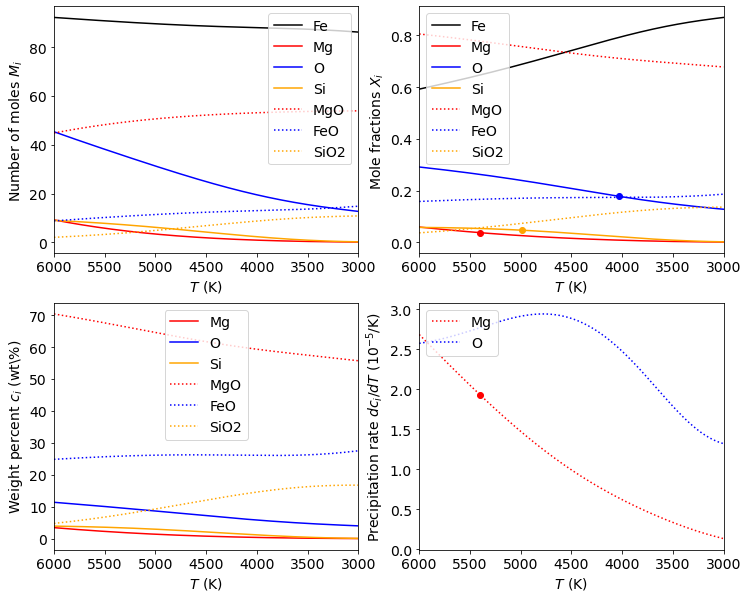

In [5]:
fac = 0.75
a_O_OS_15s , b_O_OS_15s , c_O_OS_15s  = (a_O_OS-fac*0.4), (b_O_OS+fac*900) , (c_O_OS-fac*14) 

Kd_Mg      = 10**mb.logKd(a_Mg_OS   , b_Mg_OS, c_Mg_OS , Tcmb)   
Kd_O       = 10**mb.logKd(a_O_OS_15s, b_O_OS_15s , c_O_OS_15s , Tcmb) 
Kd_Si      = 10**mb.logKd(a_Si_OS   , b_Si_OS, c_Si_OS, Tcmb) 

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # Default composition
iMFeO, iMMgO, iMSiO2  = 22, 50, 6
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol5 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var, verbose)

#mb.print_init_conc(sol4[0],sol4[2])
#mb.print_any_conc(sol4[1],sol4[3],-1)
mb.plot_all(Tcmb, sol5[5], sol5[1], sol5[3], sol5[4])

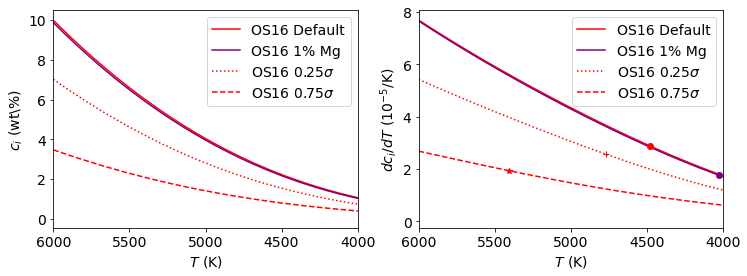

In [6]:
fig, ((ax3, ax5)) = plt.subplots(1, 2, figsize=(12,4))

# wt% Mg (element 3)
ax3.set_xlim([6000,4000])
ax3.set_xlabel("$T$ (K)")
ax3.set_ylabel("$c_{i}$ (wt\%)")
ax3.plot(Tcmb, sol1[3][3]*100 , color='red'   , label="OS16 Default")
ax3.plot(Tcmb, sol1a[3][3]*100, color='purple', label="OS16 1% Mg")
ax3.plot(Tcmb, sol4[3][3]*100, color='red'   , label="OS16 $0.25\sigma$",linestyle=':')
ax3.plot(Tcmb, sol5[3][3]*100, color='red'   , label="OS16 $0.75\sigma$",linestyle='--')
ax3.legend()

dcdT_test= np.gradient(sol1a[3][3],dT)*1e5
dcdT_def = np.gradient(sol1[3][3], dT)*1e5
dcdT_25s = np.gradient(sol4[3][3], dT)*1e5
dcdT_75s = np.gradient(sol5[3][3], dT)*1e5

# change in MgO conc (element 5)
ax5.set_xlim([6000,4000])
ax5.set_xlabel("$T$ (K)")
ax5.set_ylabel("$dc_{i}/dT$ ($10^{-5}$/K)")
ax5.plot(Tcmb, dcdT_def , color='red'   , label="OS16 Default" , linestyle='-')
ax5.plot(Tcmb, dcdT_test, color='purple', label="OS16 1% Mg"   , linestyle='-')
ax5.plot(Tcmb, dcdT_25s, color='red'   , label="OS16 $0.25\sigma$" , linestyle=':')
ax5.plot(Tcmb, dcdT_75s, color='red'   , label="OS16 $0.75\sigma$" , linestyle='--')
ax5.plot(Tcmb[sol1[4][2]] , dcdT_def[sol1[4][2]]   , color='red'   , marker='o')
ax5.plot(Tcmb[sol1a[4][2]], dcdT_test[sol1a[4][2]] , color='purple'   , marker='o')
ax5.plot(Tcmb[sol4[4][2]] , dcdT_25s[sol4[4][2]]   , color='red'   , marker='+')
ax5.plot(Tcmb[sol5[4][2]] , dcdT_75s[sol5[4][2]]   , color='red'   , marker='*')
ax5.legend()

To compare directly with Du19's reproduction of OS16

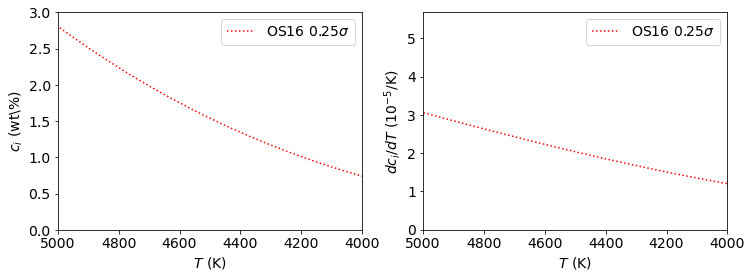

In [7]:
fig, ((ax3, ax5)) = plt.subplots(1, 2, figsize=(12,4))

# wt% Mg (element 3)
ax3.set_xlim([5000,4000])
ax3.set_ylim([0,3])       # To compare to the Du plot. 
ax3.set_xlabel("$T$ (K)")
ax3.set_ylabel("$c_{i}$ (wt\%)")
ax3.plot(Tcmb, sol4[3][3]*100, color='red'   , label="OS16 $0.25\sigma$",linestyle=':')
ax3.legend()

# change in MgO conc (element 5)
ax5.set_xlim([5000,4000])
ax5.set_xlabel("$T$ (K)")
ax5.set_ylabel("$dc_{i}/dT$ ($10^{-5}$/K)")
ax5.plot(Tcmb, dcdT_25s, color='red'   , label="OS16 $0.25\sigma$" , linestyle=':')
ax5.legend()

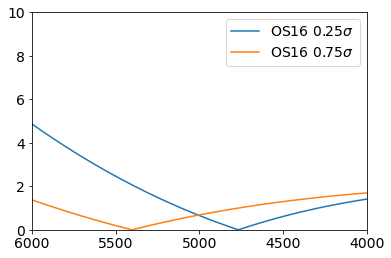

In [8]:
cprec1 = np.absolute( sol4[3][3][sol4[4][2]] - sol4[3][3])
cprec2 = np.absolute( sol5[3][3][sol5[4][2]] - sol5[3][3])

plt.ylim([0,10])
plt.xlim(6000,4000)
plt.plot(Tcmb, cprec1*100, label="OS16 $0.25\sigma$")
plt.plot(Tcmb, cprec2*100, label="OS16 $0.75\sigma$")
plt.legend()